# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17 campaigns.

SyntaxError: invalid syntax (2142139807.py, line 1)

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

import time

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
import numpy as np

In [7]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
print(df.isnull().sum().sort_values())

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64


In [10]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
print()
print(f"Total Rows in the dataset: {df.shape}")
unknown_count = (df == "unknown").sum().sum()
print(f"Total number of 'unknown' values in the dataset: {unknown_count}")
print()


Total Rows in the dataset: (41188, 21)
Total number of 'unknown' values in the dataset: 12718



In [12]:
# Identify columns where 'unknown' is present
columns_with_unknown = [col for col in df.columns if df[col].astype(str).eq('unknown').any()]

print("Rows with unknown values:",columns_with_unknown)
print()
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Rows with non-numeric values:",non_numeric_columns)

Rows with unknown values: ['job', 'marital', 'education', 'default', 'housing', 'loan']

Rows with non-numeric values: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


There are no null values in the dataset. However, there are about 13K rows with "unknown" value in it. There are 9 features that are not numeric and that need to be coerced into different data type.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Objective

The objective is to to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) to accurately predict if client will subscribe to a term deposit. By identifying customers who are likely to subcribe, we aim to proactively direct the campaigns to them through targeted marketing and thus increase campaign efficiency and reduce costs involved.

Target Variable:

The target variable is "y", which has two classes:

"Yes": Customers who has subscribed to term deposit "No": Customers who has not subscribed to term deposit

Benefits:

Achieving this goal will allow us to:

Increase customer revenue by implementing personalized term deposit acquisition campaigns. Reduce marketing costs by focusing on customers who have a greater propensity to get term deposits. Improve customer satisfaction by addressing customer needs.

In [14]:
print("\n\nAge")
df['age'].unique()
print("Min:",df['age'].min())
print("Max:",df['age'].max())

family = {
    (0, 30): '0-30',
    (31, 35): '31-35',    
    (36, 40): '36-40',
    (41, 45): '41-45',
    (46, 50): '46-50',
    (51, 55): '51-55',    
    (56, 100): '55 Plus'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in family.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['age_range'] = df['age'].apply(map_to_range)

print()
print(df['age_range'].value_counts())

print("\n\nPdays")
df['pdays'].unique()
print("Min:",df['pdays'].min())
print("Max:",df['pdays'].max())


family = {
    (0, 30): 'Less than 30 days',
    (31, 1000): 'More than 30 days'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in family.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['pdays_range'] = df['pdays'].apply(map_to_range)

print()
print(df['pdays_range'].value_counts())

print("\n\nCampaigns")
df['campaign'].unique()
print("Min:",df['campaign'].min())
print("Max:",df['campaign'].max())

family = {
    (0, 1): '1',
    (2, 3): '2',
    (3, 4): '3',
    (4, 5): '4',
    (5, 6): '5',
    (6, 7): '6',
    (7, 8): '7',
    (8, 9): '8',    
    (9, 10): '10',
    (10, 60): '11 Plus'    
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in family.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['campaign_count'] = df['campaign'].apply(map_to_range)

print()
print(df['campaign_count'].value_counts())

print("\n\nDuration")
df['duration'].unique()
print("Min:",df['duration'].min())
print("Max:",df['duration'].max())

family = {
    (0, 60): '< 1 min',
    (61, 120): '1 - 2 min',
    (121, 180): '2 - 3 min',
    (181, 300): '3 - 5 min',
    (301, 1800): '5 - 30 min',
    (1801, 5000): '> 30 min'    
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in family.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['drange'] = df['duration'].apply(map_to_range)
print(df['drange'].value_counts())

print("\n\nEuribor 3 month rate")
df['euribor3m'].unique()
print("Min:",df['euribor3m'].min())
print("Max:",df['euribor3m'].max())
print(df['euribor3m'].value_counts())

family = {
    (0, 1): '< 1.0',
    (1, 2): '1.0 - 2.0',
    (2, 3): '2.0 - 3.0',
    (3,  10): '3.0 Plus'    
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in family.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['euribor'] = df['euribor3m'].apply(map_to_range)
print(df['euribor'].value_counts())

lookup = {'mon': '1.Mon', 'tue': '2.Tue', 'wed': '3.Wed', 'thu': '4.Thu', 'fri': '5.Fri'}
df['day_of_week'] = df['day_of_week'].map(lookup).fillna(df['day_of_week'])
print(df['day_of_week'].value_counts().sort_index())

lookup = {'jan': 'a.Jan', 'feb': 'b.Feb', 'mar': 'c.Mar', 'apr': 'd.Apr', 'may': 'e.May', 'jun': 'f.Jun', 'jul': 'g.Jul', 'aug': 'h.Aug', 'sep': 'i.Sep', 'oct': 'j.Oct', 'nov': 'k.Nov', 'dec': 'l.Dec'}
df['month'] = df['month'].map(lookup).fillna(df['month'])
print(df['month'].value_counts().sort_index())



Age
Min: 17
Max: 98

31-35      7371
36-40      6094
0-30       5669
41-45      4486
46-50      3776
55 Plus    3582
51-55      2950
Name: age_range, dtype: int64


Pdays
Min: 0
Max: 999

More than 30 days    39673
Less than 30 days     1515
Name: pdays_range, dtype: int64


Campaigns
Min: 1
Max: 56

2          10570
3           5341
4           2651
5           1599
11 Plus     1094
6            979
7            629
8            400
10           283
Name: campaign_count, dtype: int64


Duration
Min: 0
Max: 4918
5 - 30 min    11103
3 - 5 min      9233
1 - 2 min      8509
2 - 3 min      7671
< 1 min        4181
> 30 min        101
Name: drange, dtype: int64


Euribor 3 month rate
Min: 0.634
Max: 5.045
4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64
3.0 Plus     27690
1.0 - 2.0     9608
< 1.0         3890
Name: euribor, dtype: int64
1.Mon 

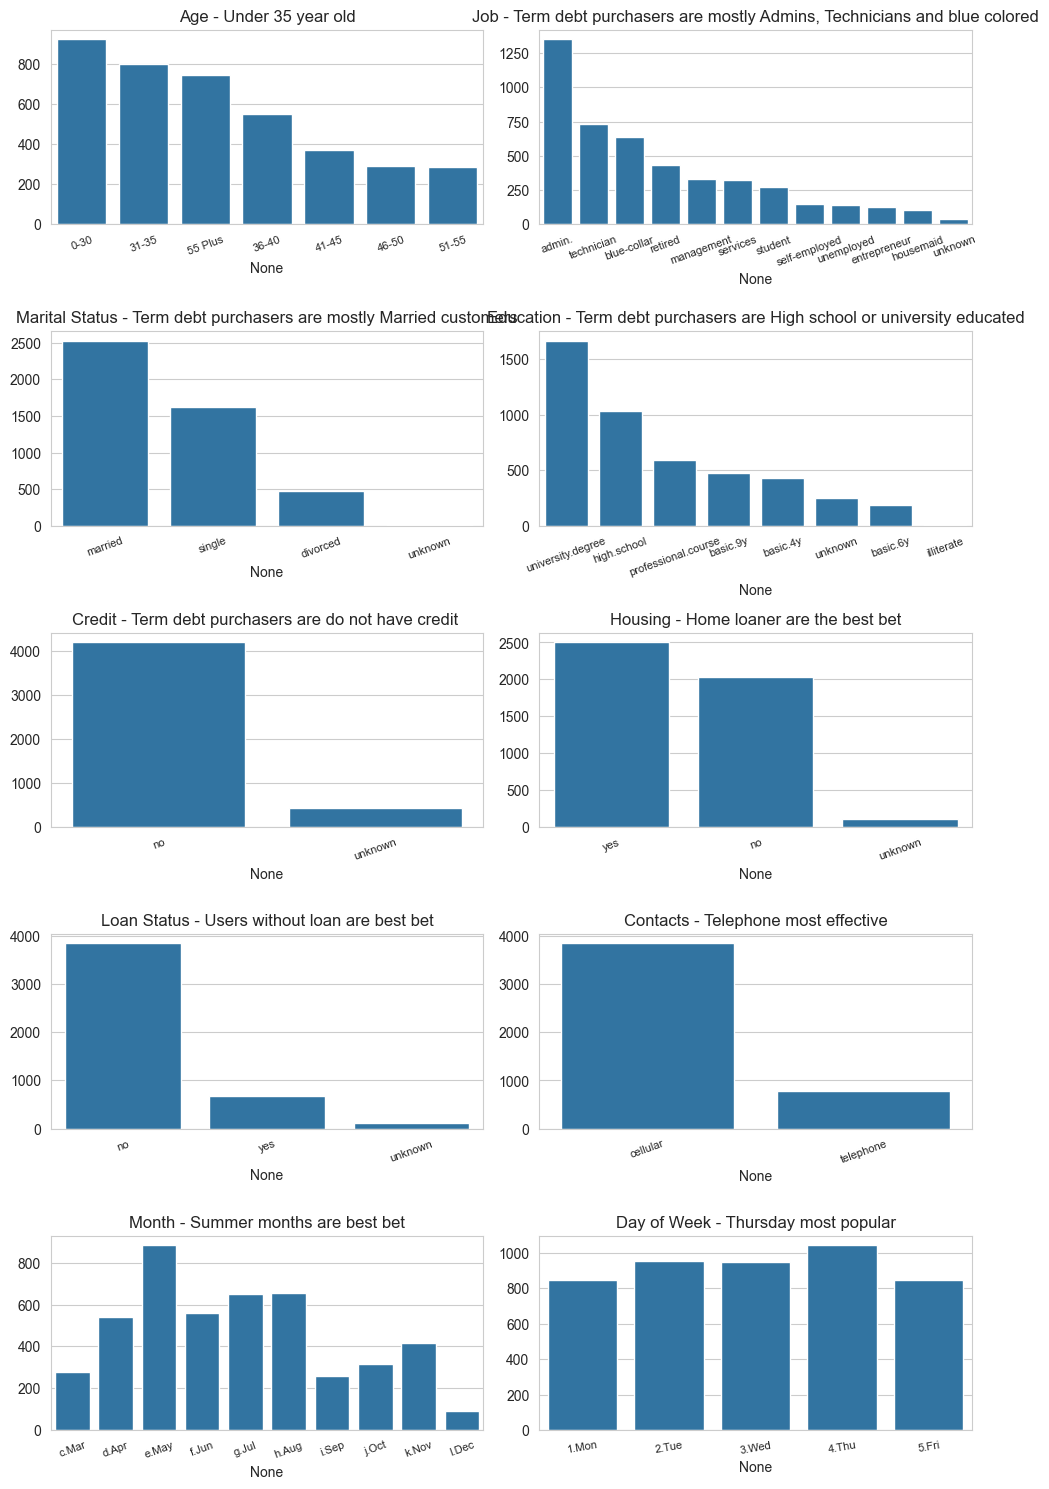

In [15]:
sns.set_style("whitegrid")

# Create subplots

fig, axes = plt.subplots(5, 2, figsize=(10, 15))



filtered_df = df[df['y'] == 'yes']

value_counts = filtered_df['age_range'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0,0])
axes[0,0].set_title('Age - Under 35 year old')
axes[0,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['job'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0,1])
axes[0,1].set_title('Job - Term debt purchasers are mostly Admins, Technicians and blue colored')
axes[0,1].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['marital'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1,0])
axes[1,0].set_title('Marital Status - Term debt purchasers are mostly Married customers')
axes[1,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['education'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1,1])
axes[1,1].set_title('Education - Term debt purchasers are High school or university educated')
axes[1,1].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['default'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[2,0])
axes[2,0].set_title('Credit - Term debt purchasers are do not have credit ')
axes[2,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['housing'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[2,1])
axes[2,1].set_title('Housing - Home loaner are the best bet')
axes[2,1].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['loan'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3,0])
axes[3,0].set_title('Loan Status - Users without loan are best bet')
axes[3,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['contact'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3,1])
axes[3,1].set_title('Contacts - Telephone most effective')
axes[3,1].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['month'].value_counts().sort_index()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[4,0])
axes[4,0].set_title('Month - Summer months are best bet')
axes[4,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['day_of_week'].value_counts().sort_index()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[4,1])
axes[4,1].set_title('Day of Week - Thursday most popular')
axes[4,1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()

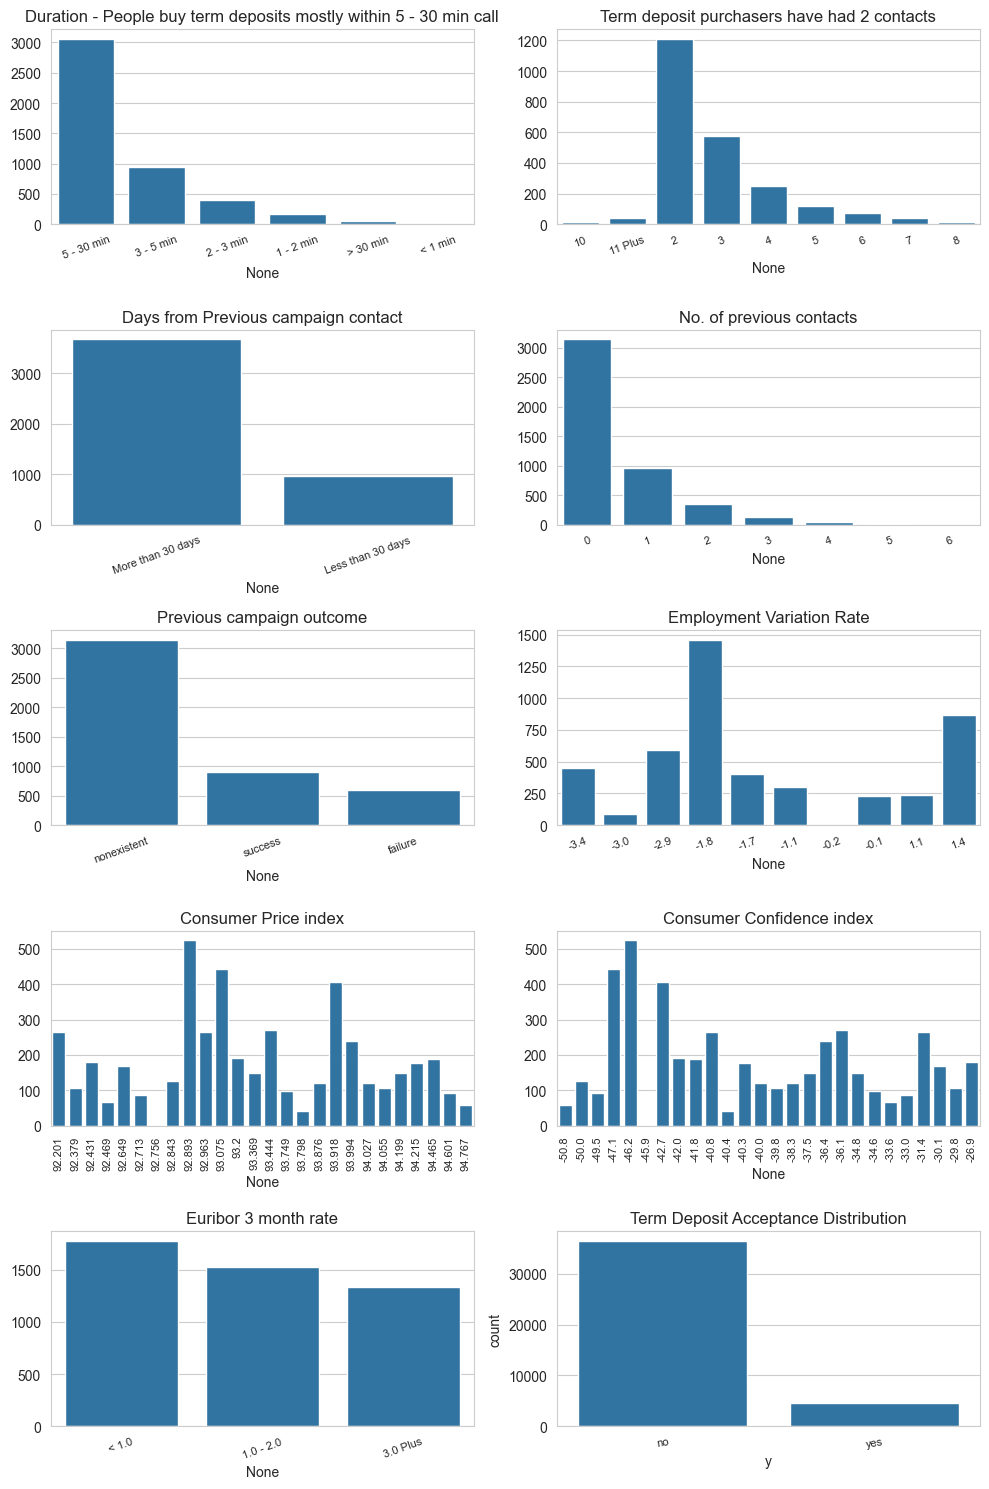

In [16]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(10, 15))


filtered_df = df[df['y'] == 'yes']

value_counts = filtered_df['drange'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0,0])
axes[0,0].set_title('Duration - People buy term deposits mostly within 5 - 30 min call')
axes[0,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['campaign_count'].value_counts().sort_index()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0,1], order=value_counts.index)
axes[0,1].set_title('Term deposit purchasers have had 2 contacts')
axes[0,1].tick_params(axis='x', labelrotation=20,labelsize=8)


value_counts = filtered_df['pdays_range'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1,0])
axes[1,0].set_title('Days from Previous campaign contact')
axes[1,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['previous'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1,1])
axes[1,1].set_title('No. of previous contacts')
axes[1,1].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['poutcome'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[2,0])
axes[2,0].set_title('Previous campaign outcome')
axes[2,0].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['emp.var.rate'].value_counts().sort_index()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[2,1])
axes[2,1].set_title('Employment Variation Rate')
axes[2,1].tick_params(axis='x', labelrotation=20,labelsize=8)

value_counts = filtered_df['cons.price.idx'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3,0])
axes[3,0].set_title('Consumer Price index')
axes[3,0].tick_params(axis='x', labelrotation=90,labelsize=8)

value_counts = filtered_df['cons.conf.idx'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3,1])
axes[3,1].set_title('Consumer Confidence index')
axes[3,1].tick_params(axis='x', labelrotation=90,labelsize=8)

value_counts = filtered_df['euribor'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[4,0])
axes[4,0].set_title('Euribor 3 month rate')
axes[4,0].tick_params(axis='x', labelrotation=20,labelsize=8)

sns.countplot(data=df, x = 'y', ax=axes[4,1])
axes[4,1].set_title('Term Deposit Acceptance Distribution')
axes[4,1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()

In [17]:
df.drop(columns=['age_range','pdays_range','campaign_count', 'drange', 'euribor','duration'], inplace=True)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Data Pre-processing

Now that we have explored the dataset, we need to preprocess the data for modeling -

We need to transform non-numeric to numeric.
Since the features are of different scales, we need to apply StandardScalar to make the dataset ready for modeling.
We need to run PCA to select the smaller subset of features.

In [18]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Exclude one column to keep as it is
column_to_keep = 'y'  # Replace with the column name you want to keep as it is
non_numeric_columns = non_numeric_columns[non_numeric_columns != column_to_keep]

# Apply one-hot encoding to remaining non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  object 
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [20]:
X = df.drop('y', axis=1)  # Drop the target column to get features
y = df['y']  # Assign the target column to y

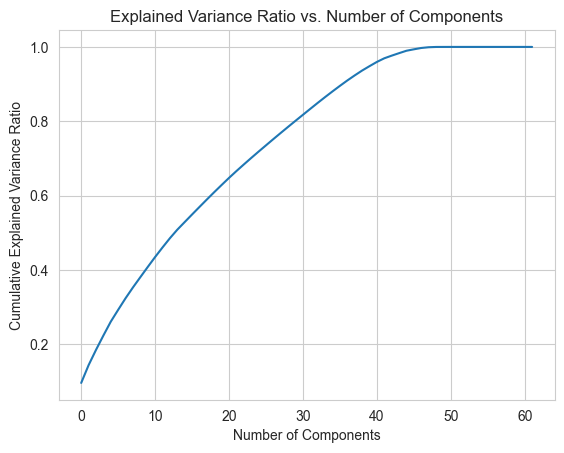

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)  # Fit PCA on your data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [22]:
# Reduce dimensionality using PCA
pca = PCA(n_components=36)
X_pca = pca.fit_transform(X_scaled)

In [23]:
label_binarizer = LabelBinarizer()
y_binary = label_binarizer.fit_transform(y).ravel()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_binary, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [25]:
start_time = time.time()

# Define and train the baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
end_time = time.time()

# Make predictions
baseline_predictions = baseline_model.predict(X_test)

baseline_training_time = end_time - start_time    

y_pred = baseline_model.predict(X_test)
baseline_probabilities = baseline_model.predict_proba(X_test)[:, 1]
baseline_roc_auc = roc_auc_score(y_test, baseline_probabilities)
avg_precision = average_precision_score(y_test, baseline_probabilities)


# Evaluate baseline model
baseline_train_accuracy = baseline_model.score(X_train, y_train)
baseline_test_accuracy = baseline_model.score(X_test, y_test)


print(f"Baseline Accuracy: {baseline_test_accuracy}")
print(f"Training time: {baseline_training_time}")

Baseline Accuracy: 0.8865015780529255
Training time: 0.002008199691772461


In [26]:
df_answer = pd.DataFrame(columns=['Method', 'Train Time', 'Train Accuracy','Test Accuracy'])

In [27]:
pd.set_option('display.max_colwidth', 100)  # Adjust the width as needed

In [28]:
next_index = len(df_answer)
df_answer.loc[next_index] = ['Baseline', baseline_training_time, baseline_train_accuracy,baseline_test_accuracy]

In [29]:
df_answer

,Method,Train Time,Train Accuracy,Test Accuracy
0,Baseline,0.002008,0.887557,0.886502


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [30]:
# Define the logistic regression model
log_reg = LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [31]:
start_time = time.time()
log_reg.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

# Evaluate the model on the test set
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)


print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"Training time: {training_time}")


next_index = len(df_answer)
df_answer.loc[next_index] = ['Logistic Regression', training_time, train_accuracy,test_accuracy]

Train set accuracy: 0.899
Test set accuracy: 0.897
Training time: 0.054107666015625


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [32]:
# Define the DecisionTree model
decisionTree = DecisionTreeClassifier()

In [33]:
start_time = time.time()
decisionTree.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

# Evaluate the model on the test set
train_accuracy = decisionTree.score(X_train, y_train)
test_accuracy = decisionTree.score(X_test, y_test)

print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"Training time: {training_time}")

next_index = len(df_answer)
df_answer.loc[next_index] = ['Decision Tree', training_time,train_accuracy,test_accuracy]

Train set accuracy: 0.995
Test set accuracy: 0.841
Training time: 3.5324108600616455


In [34]:
# Define the KNN model
knn_model = KNeighborsClassifier()

In [35]:
start_time = time.time()
knn_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

# Evaluate the model on the test set
train_accuracy = knn_model.score(X_train, y_train)
test_accuracy = knn_model.score(X_test, y_test)

print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"Training time: {training_time}")

next_index = len(df_answer)
df_answer.loc[next_index] = ['KNN', training_time, train_accuracy,test_accuracy]

Train set accuracy: 0.911
Test set accuracy: 0.889
Training time: 0.002407550811767578


In [36]:
# Define the SVC model
svc_model = SVC()

In [37]:
start_time = time.time()
svc_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

# Evaluate the model on the test set
train_accuracy = svc_model.score(X_train, y_train)
test_accuracy = svc_model.score(X_test, y_test)

print("Train set accuracy: {:.3f}".format(train_accuracy))
print("Test set accuracy: {:.3f}".format(test_accuracy))
print(f"Training time: {training_time}")

next_index = len(df_answer)
df_answer.loc[next_index] = ['SVC', training_time, train_accuracy,test_accuracy]

Train set accuracy: 0.907
Test set accuracy: 0.897
Training time: 27.453214645385742


In [38]:
df_answer

,Method,Train Time,Train Accuracy,Test Accuracy
0,Baseline,0.002008,0.887557,0.886502
1,Logistic Regression,0.054108,0.898513,0.896698
2,Decision Tree,3.532411,0.995357,0.840738
3,KNN,0.002408,0.911168,0.889172
4,SVC,27.453215,0.907041,0.896820


Observation:

Decision tree has the highest Test and training accuracy but training time is high.
KNN has the next highest Test and training accuracy with shortest training time.
SVC has the next highest Test and training accuracy but with highest training time.
Logistic regression has decent training and test accuracy with 3rd highest training time

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Model Improvement - Feature elimination: We can explore the features with correlation matrix to identify the most irrelevant features and drop them before modeling

In [39]:
df['y'] = df['y'].map({'yes': True, 'no': False})

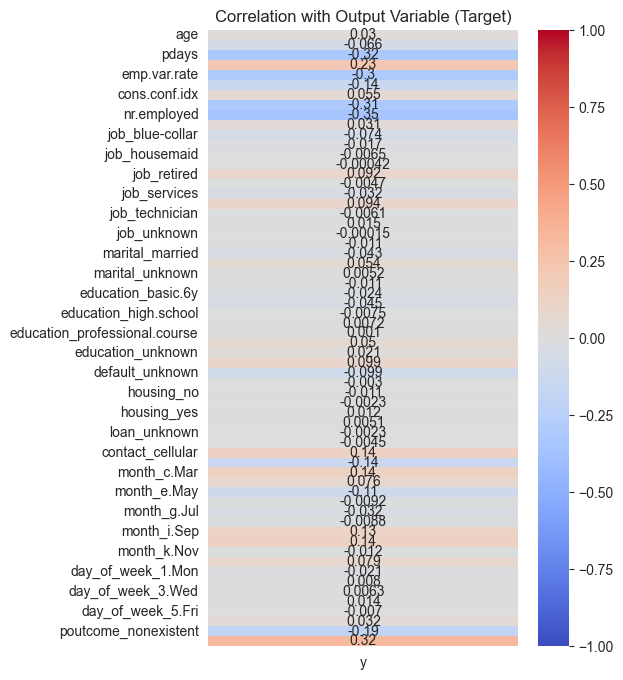

In [40]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the output variable 'target'
target_corr = correlation_matrix[['y']].copy()
target_corr = target_corr.drop(index='y')

# Plot the correlation with the output variable
plt.figure(figsize=(5, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Output Variable (Target)")
plt.show()

In [41]:
# Define the column and the threshold values
column_name = 'y'
lower_threshold = -0.1
upper_threshold = 0.1

# Filter the DataFrame using boolean indexing
filtered_df = target_corr[(target_corr[column_name] < lower_threshold) | (target_corr[column_name] > upper_threshold)]

index_list = filtered_df.index.tolist()
index_list.append('y')
print(index_list)

filtered_df = df.loc[:, index_list]

['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'contact_cellular', 'contact_telephone', 'month_c.Mar', 'month_e.May', 'month_i.Sep', 'month_j.Oct', 'poutcome_nonexistent', 'poutcome_success', 'y']


Reduce features When the correlation between feature and output variable is between 0.1 and -0.1, we can simply ignore them for modeling.

In [42]:
X = filtered_df.drop('y', axis=1)  # Drop the target column to get features
y = filtered_df['y']  # Assign the target column to y

Data Preprocessing: Now that the irrelevant features are dropped, we can apply StandardScalar to reset the scales and then do principal component analysis(PCA) to again pick the top features

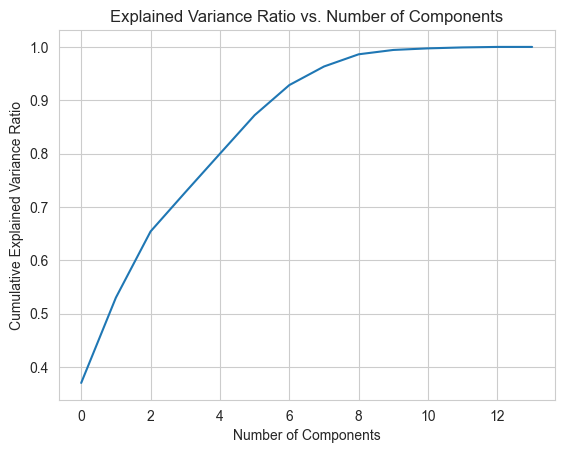

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)  # Fit PCA on your data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

In [44]:
# Reduce dimensionality using PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [46]:
start_time = time.time()

# Define and train the baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
end_time = time.time()

# Make predictions
baseline_predictions = baseline_model.predict(X_test)

baseline_training_time = end_time - start_time    

y_pred = baseline_model.predict(X_test)
baseline_probabilities = baseline_model.predict_proba(X_test)[:, 1]
baseline_roc_auc = roc_auc_score(y_test, baseline_probabilities)
avg_precision = average_precision_score(y_test, baseline_probabilities)


# Evaluate baseline model
baseline_train_accuracy = baseline_model.score(X_train, y_train)
baseline_test_accuracy = baseline_model.score(X_test, y_test)


print(f"Baseline Accuracy: {baseline_test_accuracy}")
print(f"Training time: {baseline_training_time}")

Baseline Accuracy: 0.8865015780529255
Training time: 0.0010008811950683594


In [47]:
df_answer1 = pd.DataFrame(columns=['Method', 'Train Time', 'Train Accuracy','Test Accuracy'])
pd.set_option('display.max_colwidth', 100)  # Adjust the width as needed
next_index = len(df_answer)
df_answer1.loc[next_index] = ['Baseline', baseline_training_time, baseline_train_accuracy,baseline_test_accuracy]

Model Improvement - Hyperparameter finetuning: We can use gridsearchcv to explore the different hyperparameter values for the different classification models and arrive at the best results.

In [48]:
# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}


# Set up GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [49]:
best_model = grid_search.best_estimator_

print("\nLogistic Regression:\n\n")

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

start_time = time.time()
best_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

y_pred = best_model.predict(X_test)
best_probabilities = best_model.predict_proba(X_test)[:, 1]
best_roc_auc = roc_auc_score(y_test, best_probabilities)
avg_precision = average_precision_score(y_test, best_probabilities)

    
print(f"Test Accuracy: {test_accuracy}")
print(f"Training time: {training_time}")

    
print(f"ROC AUC Score: {best_roc_auc}")
print(f"Average Precision Score: {avg_precision}")

# Evaluate  model
next_index = len(df_answer1)
df_answer1.loc[next_index] = ['Logistic'+str(grid_search.best_params_), training_time, train_accuracy,test_accuracy]
    
print("\n")
print("\n")


Logistic Regression:


Best parameters found:  {'C': 0.1, 'solver': 'saga'}
Best cross-validation accuracy: 0.899
Test Accuracy: 0.8949987861131342
Training time: 0.04650592803955078
ROC AUC Score: 0.7742041399732437
Average Precision Score: 0.4018055504496083






In [50]:
# Define parameter grid for DecisionTree Regression
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}


# Set up GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30]},
             scoring='accuracy')

In [51]:
best_model = grid_search.best_estimator_

print("\nDecisionTree Regression:\n\n")

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

start_time = time.time()
best_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

y_pred = best_model.predict(X_test)

    
print(f"Test Accuracy: {test_accuracy}")
print(f"Training time: {training_time}")


# Evaluate  model
next_index = len(df_answer1)
df_answer1.loc[next_index] = ['DecisionTree'+str(grid_search.best_params_), training_time, train_accuracy,test_accuracy]
    
print("\n")
print("\n")


DecisionTree Regression:


Best parameters found:  {'criterion': 'entropy', 'max_depth': 10}
Best cross-validation accuracy: 0.900
Test Accuracy: 0.895241563486283
Training time: 0.04310417175292969






In [52]:
# Define parameter grid for k-NN
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}



# Set up GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
best_model = grid_search.best_estimator_

print("\nKNN Regression:\n\n")

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

start_time = time.time()
best_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

y_pred = best_model.predict(X_test)
    
print(f"Test Accuracy: {test_accuracy}")
print(f"Training time: {training_time}")

# Evaluate  model
next_index = len(df_answer1)
df_answer1.loc[next_index] = ['KNN'+str(grid_search.best_params_), training_time, train_accuracy,test_accuracy]
    
print("\n")
print("\n")


KNN Regression:


Best parameters found:  {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation accuracy: 0.896
Test Accuracy: 0.894027676620539
Training time: 0.04339098930358887






In [54]:
# Define parameter grid for k-NN
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'],
}



# Set up GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy')

In [55]:
best_model = grid_search.best_estimator_

print("\nSVC Regression:\n\n")

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

start_time = time.time()
best_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
end_time = time.time()
training_time = end_time - start_time    

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

y_pred = best_model.predict(X_test)
    
print(f"Test Accuracy: {test_accuracy}")
print(f"Training time: {training_time}")

    
# Evaluate  model
next_index = len(df_answer1)
df_answer1.loc[next_index] = ['SVC'+str(grid_search.best_params_), training_time, train_accuracy,test_accuracy]
    
print("\n")
print("\n")


SVC Regression:


Best parameters found:  {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.901
Test Accuracy: 0.896698227725176
Training time: 5.082259178161621






In [56]:
df_answer1

,Method,Train Time,Train Accuracy,Test Accuracy
5,Baseline,0.001001,0.887557,0.886502
1,"Logistic{'C': 0.1, 'solver': 'saga'}",0.046506,0.899272,0.894999
2,"DecisionTree{'criterion': 'entropy', 'max_depth': 10}",0.043104,0.908316,0.895242
3,"KNN{'n_neighbors': 7, 'weights': 'uniform'}",0.043391,0.907557,0.894028
4,"SVC{'C': 0.1, 'kernel': 'rbf'}",5.082259,0.900789,0.896698


Observation:

With correlation matrix, it is clear that there are a few features have a greater influence on target variable. Using gridsearchcv, it is possible to make the the different models more accurate with more optimized hyper parameters

KNN Classifier, Decisiontree Classifier and SVC show similar test and train acccuracy. However, the training time is the least with KNN and most with SVC.

##### Questions